# Necessary Libraries

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR100
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split, ConcatDataset
import torchvision.transforms as tt


In [68]:
stats = ((0.5074,0.4867,0.4411),(0.2011,0.1987,0.2025))
train_transform = tt.Compose([
    tt.RandomHorizontalFlip(),
    tt.RandomCrop(32, padding=4, padding_mode="reflect"),
    tt.ToTensor(),
    tt.Normalize(*stats)
])

test_transform = tt.Compose([
    tt.ToTensor(),
    tt.Normalize(*stats)
])

# Loading Data

In [69]:
train_data = CIFAR100(download=True, root="./data", transform=train_transform)
test_data = CIFAR100(root="./data", train=False, transform=test_transform)

Files already downloaded and verified


In [70]:
for image, label in train_data:
    print("Image shape: ",image.shape)
    print("Image tensor: ", image)
    print("Label: ", label)
    break

Image shape:  torch.Size([3, 32, 32])
Image tensor:  tensor([[[ 2.4495,  2.4495,  2.4300,  ...,  1.8450,  1.6110,  1.2210],
         [ 2.4495,  2.4495,  2.4300,  ...,  0.9870,  0.5385,  0.9090],
         [ 2.4495,  2.4495,  2.4300,  ...,  0.0705, -0.0660,  0.3240],
         ...,
         [-0.5926, -0.0660, -0.1831,  ..., -0.2806, -0.7486, -1.9381],
         [ 0.0900,  0.2070,  0.2460,  ..., -0.1050, -0.3976, -1.6846],
         [ 0.6165,  0.5580,  0.5970,  ..., -0.0075, -0.2026, -1.0216]],

        [[ 2.5833,  2.5833,  2.5636,  ...,  1.9715,  1.8136,  1.5767],
         [ 2.5833,  2.5833,  2.5636,  ...,  0.7281,  0.2150,  0.8268],
         [ 2.5833,  2.5833,  2.5636,  ..., -0.6534, -0.9692, -0.3179],
         ...,
         [ 0.2150,  0.7084,  0.6097,  ...,  0.1952, -0.6534, -2.0547],
         [ 0.9649,  1.0833,  1.1426,  ...,  0.0176, -0.4166, -1.8179],
         [ 1.4978,  1.4781,  1.5373,  ..., -0.0613, -0.3179, -1.2258]],

        [[ 2.7600,  2.7600,  2.7406,  ...,  1.9854,  1.5593,  1

In [71]:
train_classes_items = dict()

for train_item in train_data:
    label = train_data.classes[train_item[1]]
    if label not in train_classes_items:
        train_classes_items[label] = 1
    else:
        train_classes_items[label] += 1

train_classes_items

{'cattle': 500,
 'dinosaur': 500,
 'apple': 500,
 'boy': 500,
 'aquarium_fish': 500,
 'telephone': 500,
 'train': 500,
 'cup': 500,
 'cloud': 500,
 'elephant': 500,
 'keyboard': 500,
 'willow_tree': 500,
 'sunflower': 500,
 'castle': 500,
 'sea': 500,
 'bicycle': 500,
 'wolf': 500,
 'squirrel': 500,
 'shrew': 500,
 'pine_tree': 500,
 'rose': 500,
 'television': 500,
 'table': 500,
 'possum': 500,
 'oak_tree': 500,
 'leopard': 500,
 'maple_tree': 500,
 'rabbit': 500,
 'chimpanzee': 500,
 'clock': 500,
 'streetcar': 500,
 'cockroach': 500,
 'snake': 500,
 'lobster': 500,
 'mountain': 500,
 'palm_tree': 500,
 'skyscraper': 500,
 'tractor': 500,
 'shark': 500,
 'butterfly': 500,
 'bottle': 500,
 'bee': 500,
 'chair': 500,
 'woman': 500,
 'hamster': 500,
 'otter': 500,
 'seal': 500,
 'lion': 500,
 'mushroom': 500,
 'girl': 500,
 'sweet_pepper': 500,
 'forest': 500,
 'crocodile': 500,
 'orange': 500,
 'tulip': 500,
 'mouse': 500,
 'camel': 500,
 'caterpillar': 500,
 'man': 500,
 'skunk': 500

In [72]:
test_classes_items = dict()
for test_item in test_data:
    label = test_data.classes[test_item[1]]
    if label not in test_classes_items:
        test_classes_items[label] = 1
    else:
        test_classes_items[label] += 1

test_classes_items

{'mountain': 100,
 'forest': 100,
 'seal': 100,
 'mushroom': 100,
 'sea': 100,
 'tulip': 100,
 'camel': 100,
 'butterfly': 100,
 'cloud': 100,
 'apple': 100,
 'skunk': 100,
 'streetcar': 100,
 'rocket': 100,
 'lamp': 100,
 'lion': 100,
 'wolf': 100,
 'rose': 100,
 'orange': 100,
 'dinosaur': 100,
 'chimpanzee': 100,
 'can': 100,
 'keyboard': 100,
 'bicycle': 100,
 'chair': 100,
 'plate': 100,
 'lawn_mower': 100,
 'turtle': 100,
 'palm_tree': 100,
 'shark': 100,
 'pickup_truck': 100,
 'boy': 100,
 'couch': 100,
 'house': 100,
 'porcupine': 100,
 'cockroach': 100,
 'clock': 100,
 'castle': 100,
 'beaver': 100,
 'bee': 100,
 'bottle': 100,
 'pear': 100,
 'baby': 100,
 'flatfish': 100,
 'oak_tree': 100,
 'leopard': 100,
 'snail': 100,
 'crocodile': 100,
 'rabbit': 100,
 'beetle': 100,
 'girl': 100,
 'sunflower': 100,
 'raccoon': 100,
 'train': 100,
 'ray': 100,
 'trout': 100,
 'bowl': 100,
 'snake': 100,
 'orchid': 100,
 'tractor': 100,
 'caterpillar': 100,
 'bus': 100,
 'mouse': 100,
 'cr

# BATCHSIZE & DataLoader

In [73]:
BATCH_SIZE = 128
train_dl = DataLoader(train_data, BATCH_SIZE, num_workers=4, pin_memory=True, shuffle=True)
test_dl = DataLoader(test_data, BATCH_SIZE, num_workers=4, pin_memory=True)

# Visualization

# Get CUDA ready

In [74]:
def get_device():
    if torch.cuda.is_available():
        return torch.device("cuda")
    return torch.device("cpu")

def to_device(data,device):
    if isinstance(data,(list,tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device,non_blocking=True)


class ToDeviceLoader:
    def __init__(self,data,device):
        self.data = data
        self.device = device
        
    def __iter__(self):
        for batch in self.data:
            yield to_device(batch,self.device)
            
    def __len__(self):
        return len(self.data)


In [75]:
import torch

if torch.cuda.is_available():
    print("CUDA is available!")
else:
    print("CUDA is not available. Running on CPU.")

CUDA is available!


In [76]:
import torch
print(torch.__version__)  # Check PyTorch version
print(torch.cuda.is_available())  # Check if CUDA is available
print(torch.cuda.get_device_name(0))  # Check the name of the GPU


1.13.1+cu117
True
NVIDIA GeForce RTX 4090


In [77]:
device = get_device()
print(device)

train_dl = ToDeviceLoader(train_dl, device)
test_dl = ToDeviceLoader(test_dl, device)

cuda


In [78]:
def accuracy(predicted, actual):
    _, predictions = torch.max(predicted, dim=1)
    return torch.tensor(torch.sum(predictions==actual).item()/len(predictions))

# BaseModel

In [79]:
class BaseModel(nn.Module):
    def training_step(self,batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        return loss
    
    def validation_step(self,batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        acc = accuracy(out,labels)
        return {"val_loss":loss.detach(),"val_acc":acc}
    
    def validation_epoch_end(self,outputs):
        batch_losses = [loss["val_loss"] for loss in outputs]
        loss = torch.stack(batch_losses).mean()
        batch_accuracy = [accuracy["val_acc"] for accuracy in outputs]
        acc = torch.stack(batch_accuracy).mean()
        return {"val_loss":loss.item(),"val_acc":acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [81]:
#model = ResNet(3,100)

In [82]:
#model = to_device(model, device)

In [83]:
from torchvision import models

class ResNet101Model(BaseModel):
    def __init__(self, num_classes):
        super().__init__()
        self.model = models.resnet101(pretrained=True)
        num_ftrs = self.model.fc.in_features
        self.model.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        return self.model(x)

In [84]:
model = ResNet101Model(num_classes=100)
model = to_device(model, device)

# Evaluation & Fit Function for Training

In [85]:
@torch.no_grad()
def evaluate(model,test_dl):
    model.eval()
    outputs = [model.validation_step(batch) for batch in test_dl]
    return model.validation_epoch_end(outputs)

In [86]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit (epochs, train_dl, test_dl, model, optimizer, max_lr, weight_decay, scheduler, grad_clip=None):
    torch.cuda.empty_cache()
    
    history = []
    
    optimizer = optimizer(model.parameters(), max_lr, weight_decay = weight_decay)
    
    scheduler = scheduler(optimizer, T_max=epochs * len(train_dl))
    
    for epoch in range(epochs):
        model.train()
        
        train_loss = []
        
        lrs = []
        
        for batch in train_dl:
            loss = model.training_step(batch)
            
            train_loss.append(loss)
            
            loss.backward()
            
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            scheduler.step()
            lrs.append(get_lr(optimizer))
        result = evaluate(model, test_dl)
        result["train_loss"] = torch.stack(train_loss).mean().item()
        result["lrs"] = lrs
        
        model.epoch_end(epoch,result)
        history.append(result)
        
    return history

In [87]:
epochs = 200
optimizer = torch.optim.RMSprop
max_lr = 0.0005
grad_clip = 0.1
weight_decay = 1e-4
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR

# Training

In [88]:
%%time
history = fit(epochs=epochs, train_dl=train_dl, test_dl=test_dl, model=model, 
              optimizer=optimizer, max_lr=max_lr,
              weight_decay=weight_decay, scheduler=scheduler)

Epoch [0], last_lr: 0.00050, train_loss: 3.1859, val_loss: 2.8381, val_acc: 0.3772
Epoch [1], last_lr: 0.00050, train_loss: 2.2880, val_loss: 30.1387, val_acc: 0.3380
Epoch [2], last_lr: 0.00050, train_loss: 2.1907, val_loss: 2.2913, val_acc: 0.4840
Epoch [3], last_lr: 0.00050, train_loss: 2.0834, val_loss: 2.3027, val_acc: 0.4929
Epoch [4], last_lr: 0.00050, train_loss: 1.9130, val_loss: 2.3559, val_acc: 0.5083
Epoch [5], last_lr: 0.00050, train_loss: 1.8682, val_loss: 3.0263, val_acc: 0.5090
Epoch [6], last_lr: 0.00050, train_loss: 1.8363, val_loss: 4.2413, val_acc: 0.5021
Epoch [7], last_lr: 0.00050, train_loss: 1.7798, val_loss: 3.2896, val_acc: 0.4777
Epoch [8], last_lr: 0.00050, train_loss: 1.7411, val_loss: 5.1226, val_acc: 0.4910
Epoch [9], last_lr: 0.00050, train_loss: 1.6337, val_loss: 14.2496, val_acc: 0.5101
Epoch [10], last_lr: 0.00050, train_loss: 1.6293, val_loss: 2.4124, val_acc: 0.5461
Epoch [11], last_lr: 0.00050, train_loss: 1.5586, val_loss: 8.3782, val_acc: 0.5314


# Plotting

In [89]:
def plot_acc(history):
    plt.plot([x["val_acc"] for x in history],"-x")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

def plot_loss(history):
    plt.plot([x.get("train_loss") for x in history], "-bx")
    plt.plot([x["val_loss"] for x in history],"-rx")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train loss","val loss"])
    
def plot_lrs(history):
    plt.plot(np.concatenate([x.get("lrs",[]) for x in history]))
    plt.xlabel("Batch number")
    plt.ylabel("Learning rate")

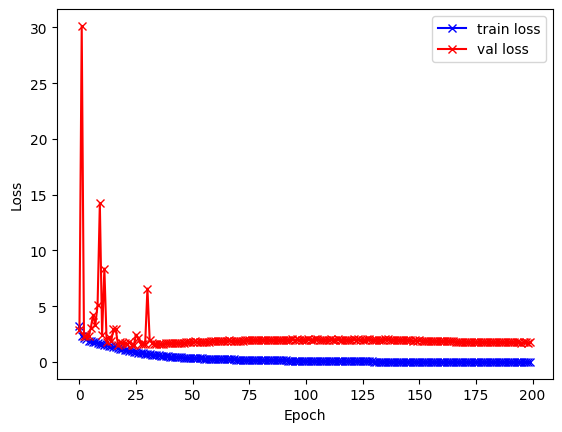

In [90]:
plot_loss(history)

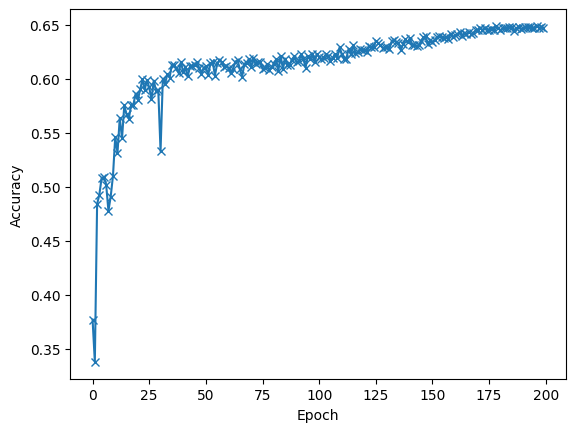

In [91]:
plot_acc(history)

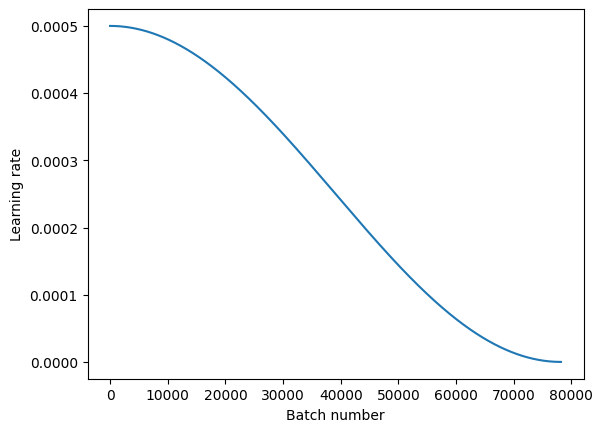

In [92]:
plot_lrs(history)

# Make predictions and see the image with its result


In [93]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return test_data.classes[preds[0].item()]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: mountain , Predicted: train


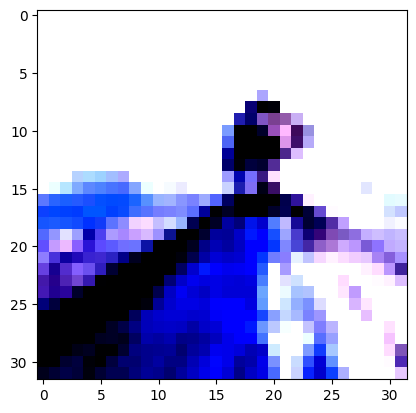

In [94]:
img, label = test_data[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_data.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: wardrobe , Predicted: wardrobe


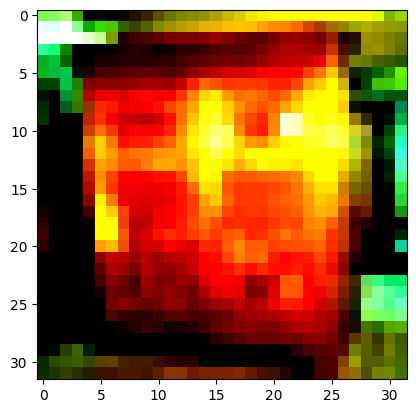

In [95]:
img, label = test_data[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_data.classes[label], ', Predicted:', predict_image(img, model))

# Save

In [96]:
torch.save(model.state_dict(), 'rmsprop_pretrained.pth')

In [97]:
print("finish")

finish


In [98]:
def test_accuracy(model, test_data):

    correct = 0
    for image, label in test_data:
        
        y = predict_image(image, model)
        if y == test_data.classes[label]:
            correct += 1

    return correct/len(test_data)

In [99]:
test_accuracy(model, test_data)

0.6453